In [1]:
'''
    This function will be used for
    -   taking a dataset in
    -   temporary removal of all targets
    -   and analyzing orthogonality with PCA decomposition
'''
#imports
import pandas as pd
import numpy as np

#read in data - NOTE changeable name
data = pd.read_csv('betaset.csv')

#remove all targets - NOTE current solution, may change
data = data.drop(columns=[f't_{i}' for i in range(1,61)])

In [2]:
#introduce PCA

from sklearn.decomposition import PCA
pca = PCA()

#normalize before PCA utilization

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

#fit scaler
X_normalized = scaler.fit_transform(data)
#fit pca
X = pca.fit_transform(X_normalized)

#print(pca.get_covariance()) #optional printout, buggy in jn

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[2.25016748e-01 1.78918721e-01 1.76151634e-01 1.10485427e-01
 5.11457449e-02 3.61703355e-02 2.21927737e-02 1.79760170e-02
 1.49279266e-02 1.11275784e-02 6.90856022e-03 6.05469100e-03
 5.05798079e-03 4.66828554e-03 4.37736760e-03 3.78313111e-03
 3.65879058e-03 3.22839438e-03 3.02936687e-03 2.80570617e-03
 2.68819278e-03 2.57242477e-03 2.41162239e-03 2.36441388e-03
 2.28271818e-03 2.20212583e-03 2.13526745e-03 2.11104517e-03
 2.03506122e-03 1.98782449e-03 1.95343184e-03 1.91668924e-03
 1.88924530e-03 1.87098160e-03 1.85627238e-03 1.84970595e-03
 1.82784342e-03 1.81015596e-03 1.79745685e-03 1.78229085e-03
 1.77383391e-03 1.76532970e-03 1.75555772e-03 1.75416266e-03
 1.74345107e-03 1.74167211e-03 1.73332287e-03 1.71787700e-03
 1.70537808e-03 1.70228361e-03 1.69392248e-03 1.68826266e-03
 1.67643715e-03 1.67254090e-03 1.66729117e-03 1.66139821e-03
 1.65492926e-03 1.65401812e-03 1.64893785e-03 1.64169244e-03
 1.63792279e-03 1.63538736e-03 1.62934790e-03 1.62482183e-03
 1.61762893e-03 1.607580

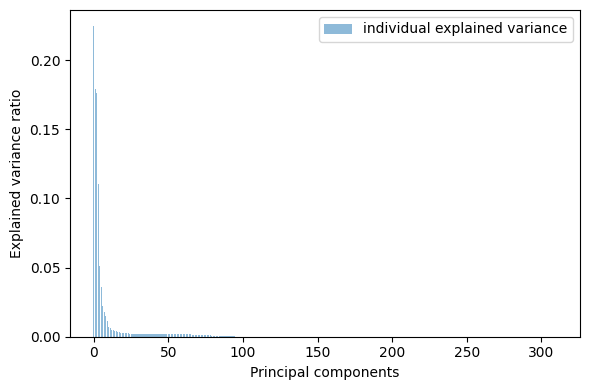

In [3]:
import matplotlib.pyplot as plt

#plot current info collection

plt.figure(figsize=(6, 4))

plt.bar(range(X.shape[1]), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Working with 311 features



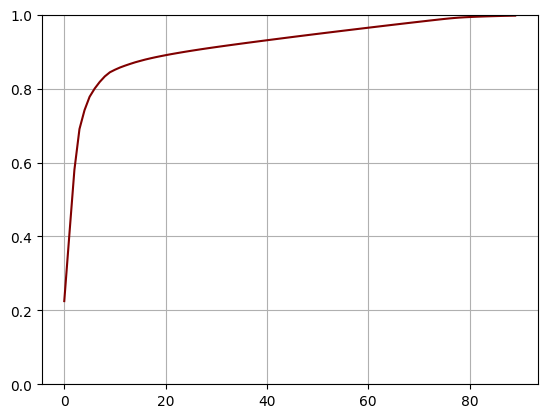

In [4]:
X_normalized = StandardScaler().fit_transform(data)

print(f'Working with {X_normalized.shape[1]} features\n')

dimensionality = 90

data_loss = []
for i in range(dimensionality):
    pca = PCA(n_components = i+1)
    pca.fit(X_normalized)
    X_new = pca.transform(X_normalized)
    retained_variance = np.sum(pca.explained_variance_ratio_)
    data_loss.append(retained_variance)

plt.plot(range(dimensionality), data_loss, color='maroon')
plt.grid()
plt.ylim(0,1)
plt.show()